In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data=pd.read_csv('/content/drive/MyDrive/Customer-Churn-Prediction.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
data.shape

(7043, 21)

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data=data.drop('customerID',axis=1)

In [16]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

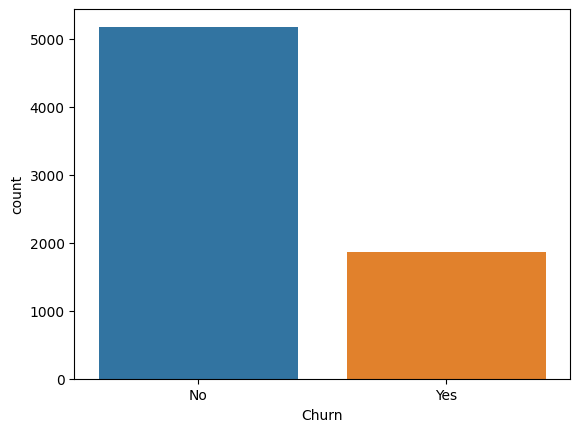

In [24]:
sns.countplot(x='Churn',data=data)

<Axes: xlabel='gender', ylabel='count'>

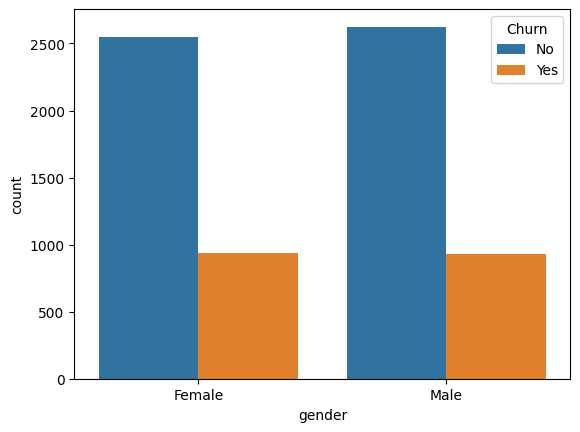

In [25]:
sns.countplot(x='gender',hue='Churn',data=data)

In [35]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
data=data.drop(columns=['gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'],axis=1)

In [37]:
print(data['TotalCharges'].dtypes)

object


In [38]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [39]:
data=data.dropna(subset=['TotalCharges'])

In [40]:
print(data['TotalCharges'].dtypes)

float64


In [41]:
data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
data=pd.get_dummies(data,columns=['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','PaymentMethod'])

In [43]:
data['Churn']=data['Churn'].replace({'Yes':1,'No':0})

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
lb=LabelEncoder()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76b8162d70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76b8163190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76b8162ad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f76b81636d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76b8163970>,
 'means': []}

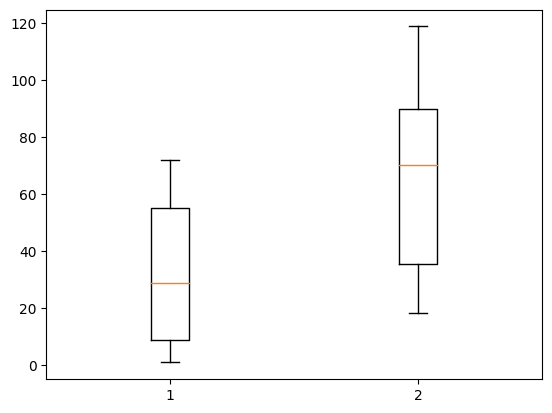

In [46]:
plt.boxplot(data[['tenure','MonthlyCharges']])

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [51]:
X=data.drop('Churn',axis=1)
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,OnlineSecurity_No,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,0,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [52]:
y=data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [53]:
select=SelectKBest(chi2)

In [54]:
select.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x7f76b81e9cf0>)

In [55]:
select.scores_

array([1.63792537e+04, 3.65307468e+03, 6.29630810e+05, 2.61059473e+01,
       1.34503870e+02, 7.63241032e+01, 8.18577694e+01, 5.58562534e+01,
       1.31271509e+02, 4.14036636e+02, 2.85475152e+02, 1.47165601e+02,
       2.82490201e+02, 2.85475152e+02, 3.12098318e+01, 2.50189168e+02,
       2.85475152e+02, 2.02160070e+01, 4.04010811e+02, 2.85475152e+02,
       1.35439602e+02, 5.16714004e+02, 1.76608724e+02, 4.86223101e+02,
       1.52777027e+02, 1.04979224e+02, 7.66190658e+01, 9.99725387e+01,
       4.24113152e+02, 4.47251434e+01])

In [56]:
score_col=pd.DataFrame({'Scores':select.scores_})

In [58]:
col=pd.DataFrame({'Columns':X.columns})
col

,Columns
0,tenure
1,MonthlyCharges
2,TotalCharges
3,SeniorCitizen_0
4,SeniorCitizen_1
5,Partner_No
6,Partner_Yes
7,Dependents_No
8,Dependents_Yes
9,OnlineSecurity_No


In [59]:
score_data=pd.concat([col,score_col],axis=1)
score_data

,Columns,Scores
0,tenure,16379.253671
1,MonthlyCharges,3653.074681
2,TotalCharges,629630.810349
3,SeniorCitizen_0,26.105947
4,SeniorCitizen_1,134.503870
5,Partner_No,76.324103
6,Partner_Yes,81.857769
7,Dependents_No,55.856253
8,Dependents_Yes,131.271509
9,OnlineSecurity_No,414.036636


In [60]:
select_new=SelectKBest(score_func=f_classif)

In [61]:
select_new.fit(X,y)

SelectKBest()

In [62]:
scor_col1=select_new.scores_

In [63]:
score_col_1=pd.DataFrame({'Scores':scor_col1})

In [64]:
score_data_1=pd.concat([col,score_col_1],axis=1)

In [65]:
score_data_1

,Columns,Scores
0,tenure,1007.658238
1,MonthlyCharges,271.576990
2,TotalCharges,291.344862
3,SeniorCitizen_0,164.317116
4,SeniorCitizen_1,164.317116
5,Partner_No,161.775966
6,Partner_Yes,161.775966
7,Dependents_No,192.188857
8,Dependents_Yes,192.188857
9,OnlineSecurity_No,932.621505


In [66]:
x=StandardScaler().fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [77]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
logmodel.score(X_test,y_test)

0.7995735607675906

In [79]:
log_pred = logmodel.predict(X_test)

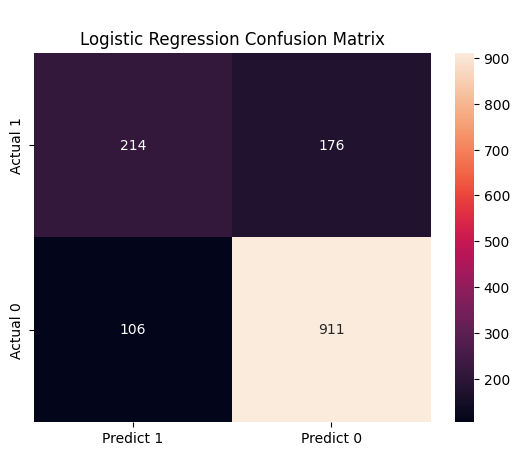

In [81]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, log_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nLogistic Regression Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]


In [82]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('\nClassification accuracy: {0:0.4f}'.format(classification_accuracy))


Classification accuracy: 0.7996
